In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load image data
import os
from PIL import Image
from tqdm import tqdm


### Open the label file (labels-map-proj-v3.txt) and get the lable lines

In [3]:
# Download the dataset to the 'nasa_data_v3' folder (that is the older version) and open the file
# Labels are stored in labels-map-proj-v3.txt file
#################################################################

words_path = "nasa_data_v3"
words_list = []

words = open(f"{words_path}/labels-map-proj-v3.txt", "r").readlines()
for line in words:
    if line.split(" ")[1] != "err":  # remove errored entries
        words_list.append(line)

print("Total label size:", len(words_list))

# print one example of the label line
print(words_list[0])


Total label size: 73031
ESP_011623_2100_RED-0069.jpg 0



### Get image data

In [44]:
# Handwritten text images are stored under the path (./nasa_data/map-proj-v3)
# Define a function to get the image path and image data
#################################################################################

base_image_path = os.path.join(words_path, "map-proj-v3")

def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    final_samples = []
    for (i, file_line) in enumerate(samples):
        file_name = file_line.split(" ")[0]
        label = file_line.split(" ")[1].strip('\n')

        # Each line split will have this format for the corresponding image:
        # file_name.jpg
        img_path = os.path.join(base_image_path, file_name)
        
        #If the file doesn't exist at the path, path.getsize() will raise a FileNotFoundError exception
        # if the file is not found, skip it
        if os.path.exists(img_path) and os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(label)
            final_samples.append(file_line.strip('\n'))

    return paths, corrected_samples, final_samples

In [50]:
# process words_list
img_paths, labels, img_list = get_image_paths_and_labels(words_list)

In [70]:
# #save the dataframe as a csv file
# # nasa_df.to_csv('nasa_data/nasa_label.csv', index=False)

# load the csv file
label_desc = pd.read_csv('nasa_data/landmarks_map-proj-v3_classmap.csv', header=None)

# # create a dictionary from the csv file to show the class name for each label
label_dict = dict(zip(label_desc[0], label_desc[1]))  
label_dict

{0: 'other',
 1: 'crater',
 2: 'dark dune',
 3: 'slope streak',
 4: 'bright dune',
 5: 'impact ejecta',
 6: 'swiss cheese',
 7: 'spider'}

In [85]:
# change the labels to integer values
labels = [int(label) for label in labels]

# create a new label description list with the class name
label_desc = []
for label in labels:
    label_desc.append(label_dict[label])

print(label_desc[:5])
print("Length of label description list:", len(label_desc))


['other', 'other', 'other', 'other', 'crater']
Length of label description list: 7495


In [93]:
# count for each type of label in the label description list
label_count = {}
for label in label_desc:
    if label in label_count:
        label_count[label] += 1
    else:
        label_count[label] = 1

# save the label count dictionary to a dataframe
label_count_df = pd.DataFrame.from_dict(label_count, orient='index', columns=['count'])
label_count_df.index.name = 'label'
label_count_df = label_count_df.reset_index()
label_count_df

,label,count
0,other,6253
1,crater,502
2,slope streak,223
3,spider,52
4,swiss cheese,122
5,dark dune,124
6,bright dune,199
7,impact ejecta,20


Text(0.5, 1.0, 'crater')

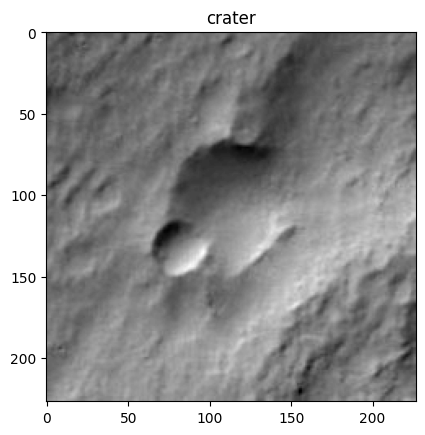

In [88]:
# show one sample image
img_paths[0]
#show the image
img = Image.open(img_paths[4])
plt.imshow(img, cmap='gray')

# set the image title to the corresponding label
plt.title(label_desc[4])

In [89]:
### Split label line into training, validation and test

# randomly shuffle the label data
# Use 90% data for training, 5% for validation and 5% for test
####################################################################


np.random.seed(100)
np.random.shuffle(img_list)

split_idx = int(0.9 * len(img_list))
train_samples = img_list[:split_idx]
test_samples = img_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

# # validate data split is done correctly
assert len(img_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Final training size: {len(train_samples)}")
print(f"Final validation size: {len(validation_samples)}")
print(f"Final test size: {len(test_samples)}")
print(f"Final data size: {len(img_list)}")
print("\nA sample label line:", train_samples[0])


Final training size: 6745
Final validation size: 375
Final test size: 375
Final data size: 7495

A sample label line: ESP_026247_1650_RED-0080-r180.jpg 0
